In [2]:
import numpy as np
from scipy.integrate import odeint, ode
import matplotlib.pyplot as plt

In [50]:
# Sistema de ecuaciones
def f(t, z):
    x = z[0]
    y = z[1]
    dxdt = x-y
    dydt = x**2-4
    return [dxdt, dydt]
# En función de lo que ponga dentro de z va a evaluar dxdt y dydt en distintos puntos. f te construye el campo vector.

In [47]:
# Nulclinas
XX, YY = np.meshgrid(np.arange(-10, 10, .01), np.arange(-10, 10, .01))
DX, DY = f(0, [XX, YY])

# nulx = plt.contour(XX, YY, DX, levels=[0], colors='red', linestyles='dashed')
# plt.clabel(nulx, nulx.levels, fmt='$\dot{x}=0$')
# nuly = plt.contour(XX, YY, DY, levels=[0], colors='black', linestyles='dashed')
# plt.clabel(nuly, nuly.levels, fmt='$\dot{y}=0$')
# plt.show ()
print (f(0,[XX, YY])[0])

[[ 0.000e+00  1.000e-02  2.000e-02 ...  1.997e+01  1.998e+01  1.999e+01]
 [-1.000e-02  0.000e+00  1.000e-02 ...  1.996e+01  1.997e+01  1.998e+01]
 [-2.000e-02 -1.000e-02  0.000e+00 ...  1.995e+01  1.996e+01  1.997e+01]
 ...
 [-1.997e+01 -1.996e+01 -1.995e+01 ...  0.000e+00  1.000e-02  2.000e-02]
 [-1.998e+01 -1.997e+01 -1.996e+01 ... -1.000e-02  0.000e+00  1.000e-02]
 [-1.999e+01 -1.998e+01 -1.997e+01 ... -2.000e-02 -1.000e-02  0.000e+00]]


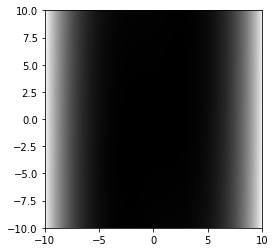

In [8]:
# Puntos fijos
def abs_deriv(x, y):
    dx, dy = f(0, [x, y])
    return(np.sqrt(dx**2+dy**2))

cmap = plt.gray()
im = plt.imshow(DX**2+DY**2, interpolation='bilinear', origin='lower',
                cmap=cmap, extent=(-10, 10, -10, 10))
plt.show ()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


(-10, 10)

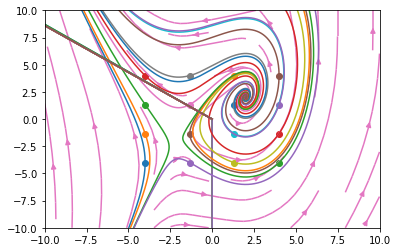

In [5]:
# Integracion odeint
dt = 0.0001
tmax = 10
t = np.arange(0, tmax, dt)
tpre = -10
tant = np.arange(0, tpre, -dt)
Xi = np.linspace(-4, 4, 4)
Yi = np.linspace(-4, 4, 4)
plt.figure()
for xi in Xi:
    for yi in Yi:
        plt.scatter(xi, yi)
        zi = [xi, yi]
        sol_fut = odeint(f, zi, t, tfirst=True)
        sol_pas = odeint(f, zi, tant, tfirst=True)
        x_fut = sol_fut[:, 0]
        x_pas = sol_pas[:, 0][::-1]
        xt = np.concatenate((x_pas, x_fut))
        y_fut = sol_fut[:, 1]
        y_pas = sol_pas[:, 1][::-1]
        yt = np.concatenate((y_pas, y_fut))
        plt.plot(xt, yt)
X = np.linspace(-10, 10, 8)
Y = np.linspace(-10, 10, 8)
XX, YY = np.meshgrid(X, Y)
DX, DY = f(0, [XX, YY])
plt.streamplot(XX, YY, DX, DY, density=.5, minlength=.1)
plt.xlim(-10, 10)
plt.ylim(-10, 10)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


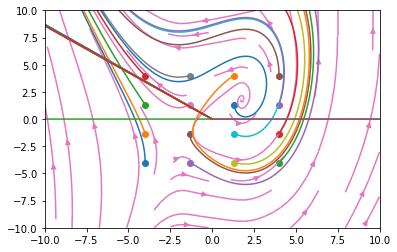

In [8]:
# Integracion odeint MODIFICADO.
dt = 0.00001
tmax = 10
tpre = -10
t = np.arange(tpre, tmax, dt)

Xi = np.linspace(-4, 4, 4)
Yi = np.linspace(-4, 4, 4)
plt.figure()
for xi in Xi:
    for yi in Yi:
        plt.scatter(xi, yi)
        zi = [xi, yi]
        sol= odeint(f, zi, t, tfirst=True)
        x = sol[:, 0]
        y = sol[:, 1]
        plt.plot(x, y)
X = np.linspace(-10, 10, 8)
Y = np.linspace(-10, 10, 8)
XX, YY = np.meshgrid(X, Y)
DX, DY = f(0, [XX, YY])
plt.streamplot(XX, YY, DX, DY, density=.5, minlength=.1)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show ()
## Conclusión: Si no integro primero el futuro y después el pasado, y quiero integrar todo junto sale peor.
## Importante: En el parámetro t, al integrar con Odeint, uno tiene que poner una secuencia de números monotonamente creciente o
## monótonamente decreciente.

In [ ]:
# Integracion rk

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\_ode.py:1177: UserWarning: dopri5: step size becomes too small
  self.messages.get(istate, unexpected_istate_msg)))


(-10, 10)

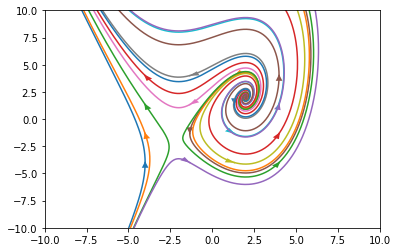

In [58]:
dt = 0.01
tmax = 10
t = np.arange(0, tmax, dt)
tpre = -10
# Este es un integrador. Integra la función "f" utilizando el método "dopri5". 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.ode.html
solver = ode(f).set_integrator('dopri5')
tant = np.arange(0, tpre, -dt)
Xi = np.linspace(-4, 4, 4)
Yi = np.linspace(-4, 4, 4)
plt.figure()
for xi in Xi:
    for yi in Yi:
        zi = [xi, yi]
        solver.set_initial_value(zi, 0)
        # Armo 2 arrays + lleno de ceros al principio y después lleno de "nan".
        xt = np.zeros_like(t)
        xt.fill(np.nan)
        yt = np.zeros_like(t)
        yt.fill(np.nan)
        
        for ix, tt in enumerate(t):
            xt[ix], yt[ix] = solver.integrate(t[ix]) # Supongo que aca comienzo a integrar la función "f".
        line = plt.plot(xt, yt)
        c = line[0].get_color()
        dxi, dyi = f(0, zi)
        plt.arrow(xi, yi, dxi*dt, dyi*dt, shape='full', lw=0,
                  length_includes_head=True, head_width=.4, color=c)
        
        # Lo mismo que antes pero ahora integro hacia el pasado.
        solver.set_initial_value(zi, 0)
        xant = np.zeros_like(tant)
        xant.fill(np.nan)
        yant = np.zeros_like(tant)
        yant.fill(np.nan)
        for ix, tt in enumerate(tant):
            xant[ix], yant[ix] = solver.integrate(tant[ix])
        plt.plot(xant, yant, color=c)
plt.xlim(-10, 10)
plt.ylim(-10, 10)


In [ ]:
# Linealizacion
def J(x, y):
    return np.matrix(([1, -1], [2*x, 0]))


fp = [[-2, -2], [2, 2]]